In [1]:
from sympy import *
import numpy as np

init_printing(use_unicode=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct
import scipy.interpolate
import platform

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

In [3]:
import qiskit
import sympy as sym

In [4]:
qiskit.IBMQ.save_account('2537d4125e263262381a269464d18da5d1d1a37a4a00534ce31274e9e2186327f9f93c3cf4265d538d599408669cf7ebe06b299ead2876a3035550c0071af3b6', overwrite=True)

C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\1308432029.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  qiskit.IBMQ.save_account('2537d4125e263262381a269464d18da5d1d1a37a4a00534ce31274e9e2186327f9f93c3cf4265d538d599408669cf7ebe06b299ead2876a3035550c0071af3b6', overwrite=True)
C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\1308432029.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ib

In [5]:
from qiskit import *
nshots = 10000
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_quito')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [6]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

ibm_perth                    ibm_nairobi                  ibm_lagos
---------                    -----------                  ---------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  7
Pending Jobs: 310            Pending Jobs: 139            Pending Jobs: 42
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      191.9          Avg. T1:      110.1          Avg. T1:      123.7
Avg. T2:      118.3          Avg. T2:      69.4           Avg. T2:      71.1



ibmq_manila                  ibmq_jakarta                 ibmq_quito
-----------                  ------------                 ----------
Num. Qubits:  5              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 40             Pending Jobs: 134            Pending Jobs: 21
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operatio

In [7]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
import math 
%matplotlib inline

In [8]:
def cb(d, j):
    cbs = np.zeros(d,1); cbs[j] = 1
    return cbs

In [9]:
def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

In [10]:
def concurrence(rho):
    R = rho*tp(Pauli(2),Pauli(2))*conjugate(rho)*tp(Pauli(2),Pauli(2))
    evals = zeros(4,1)
    ev = eVals(R)
    evm = max(abs(ev[0]), abs(ev[1]), abs(ev[2]), abs(ev[3]))
    C = 2.0*sqrt(abs(evm)) - sqrt(abs(ev[0])) - sqrt(abs(ev[1])) - sqrt(abs(ev[2])) - sqrt(abs(ev[3]))
    if C < 0.0:
        C = 0.0
    return C

In [11]:
# Outside these functions, initialize: rhos = zeros(ds,ds), s=A,B
def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB
def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

In [12]:
def ptranspose(da,db,rho,ssys):
    ptp = zeros(da*db,da*db)
    if ssys == 'b':
        for ja in range(0,da):
            for ka in range(0,da):
                for jb in range(0,db):
                    for kb in range(0,db):
                        ptp[ja*db+kb,ka*db+jb] = rho[ja*db+jb,ka*db+kb]
    elif ssys == 'a':
        for ja in range(0,da):
            for ka in range(0,da):
                for jb in range(0,db):
                    for kb in range(0,db):
                        ptp[ka*db+jb,ja*db+kb] = rho[ja*db+jb,ka*db+kb]
    return ptp

In [13]:
# outside this function, initialize: rhoTb = zeros(4,4); evals = zeros(4,1)
def negativity(da, db, rho):
    d = da*db
    rhoTb = ptranspose(da, db, rho,'b')
    En = (norm_tr(rhoTb) - 1)/2
    return En

In [14]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\919383025.py:1: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


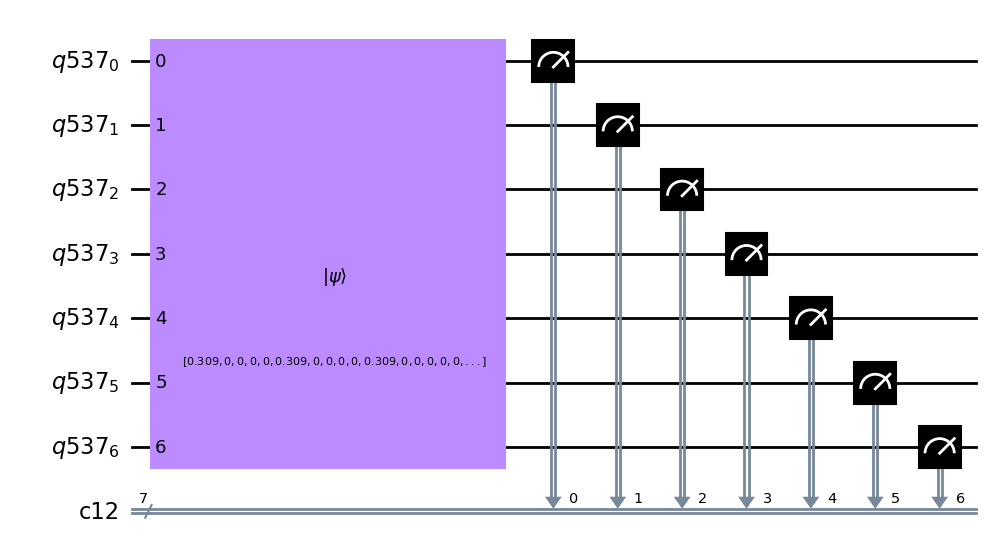

In [270]:
# Initializing a four-qubit quantum state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 


# |0000000>  |0101000> |1010000> |0001001> |0110010> |1000011> |0100100> |1001101> |0010110>

# 0 = |0000000>  10 =|0101000> 5 =|1010000> 72=|0001001> 38=|0110010> 
# 97 =|1000011> 18 =|0100100> 89=|1001101> 52=|0010110>


desired_vector = [
    math.sqrt(2/21),0,0,0,0,
    math.sqrt(2/21),0,0,0,0,
    math.sqrt(2/21),0,0,0,0,
    0,0,0,math.sqrt((5-3)/21),0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,math.sqrt(3/21),0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,math.sqrt((5-3)/21),0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,math.sqrt(3/21),0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,math.sqrt((5-3)/21),
    0,0,0,0,0,
    0,0,math.sqrt(3/21),0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0,0,0,
    0,0,0]


qr = QuantumRegister(7)
cr = ClassicalRegister(7)
#qc = QuantumCircuit(qr)
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3],qr[4],qr[5],qr[6]])

#qc.measure(qr[0],cr[0])
qc.measure(qr,cr)
#qc.measure(qr[1],cr[1]);
#qc.measure([1],[1]);
qc.draw(output='mpl')
#type(desired_vector)


In [271]:
result = execute(qc, backend = simulator, shots = nshots).result()

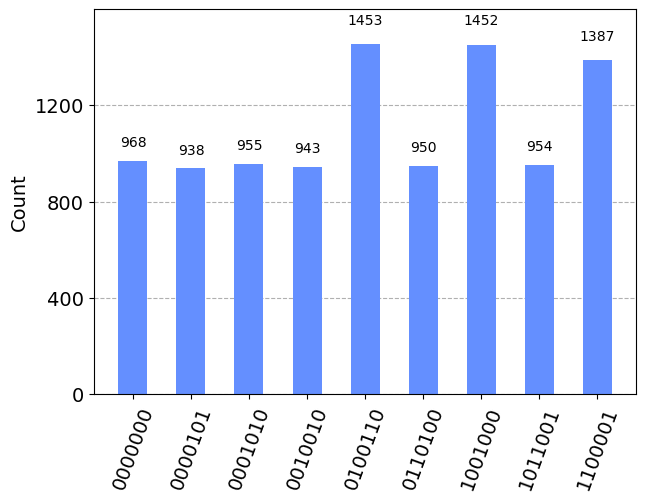

In [272]:
# para visualizar o histograma da distribuicao de probabilidades
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(qc))

In [33]:
import numpy as np
from numpy.linalg import lapack_lite
  

In [36]:
n = 4 # dimensão do operador densidade
rho = np.zeros((n,n), dtype=np.float64) # matriz para o operador densidade
#norm = 0.0 # norma de Frobenius do operador densidade
print(rho)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [37]:
for i in range(n):
    for j in range(n):
        rho[i,j] = np.random.rand()-0.5


In [38]:
norm = np.linalg.norm(rho)
rho /= norm
print("Operador densidade:")
print(rho)



Operador densidade:
[[-0.02588009 -0.10359888 -0.35535557 -0.11437528]
 [ 0.03165653  0.06930175 -0.10522351 -0.37016137]
 [-0.34223779 -0.43551967  0.46276282  0.17490653]
 [ 0.21757138  0.07437254  0.12552645 -0.27417263]]


In [57]:
#### outra forma

In [58]:
import numpy as np

def cb(n, i):
    return np.eye(n)[:, i]

In [59]:
np.eye(3)[:, 0]

array([1., 0., 0.])

In [73]:
import numpy as n
from scipy.linalg import lapack

# Definindo a dimensão do operador densidade
n = 2

# Gerando uma matriz hermitiana aleatória
A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
H = (A + A.conj().T) / 2
# Calculando os autovalores e autovetores
w, vr, info = lapack.zheev(H, overwrite_a=True)
# Construindo o operador densidade a partir dos autovalores e autovetores
rho = np.zeros((n, n), dtype=np.complex128)
psi = 0
U_ = 0
#np.zeros((n, 1), dtype=np.complex128)

for i in range(len(vr)):
    vr[:, i] = vr[:, i]/np.linalg.norm(vr[:, i])
for i in range(n):
    rho += w[i] * np.outer(vr[:, i], vr[:, i].conj())
    #w[i]=np.where(np.array(w[i]) > 0, np.array(w[i]), 0)
    psi += math.sqrt(w[i])*np.eye(n)[:, i]
    #psi += np.sqrt(w[i])*vr[:, i]/trace_rho
    U_ += vr[:, :]/np.inner(vr[:, i].conj(),vr[:, i])
# Cria três matrizes coluna de exemplo # não necessário pois vr normalizado retorna matriz U DESEJADA
#col1 = np.array(vr[:, 0])
#col2 = np.array(vr[:, 1])
# Empilha as matrizes coluna em uma única matriz
#U_ = np.column_stack((col1, col2))
#threshold = 0.001
#y = np.where(np.logical_and(w[i] >= 0, ~np.isclose(w[i], 0, rtol=0, atol=threshold)), w[i], 0)

print(psi)





[0.43686293 0.91684918]


In [61]:
print(U_)

[[ 1.40189503+0.53964667j  1.23226063+0.47434746j]
 [-1.32040592+0.j          1.5021745 +0.j        ]]


In [95]:
import numpy as np
from scipy.linalg import lapack

# Definindo a dimensão do operador densidade
n = 4

# Gerando uma matriz hermitiana aleatória
A = np.random.rand(n, n) + 1j * np.random.rand(n, n)
H = (A + A.conj().T) / 2

# Definindo a dimensão da matriz hermitiana
n = 4

# Normalizando o traço da matriz hermitiana para 1
H = np.divide(H, np.trace(H))

# Calculando os autovalores e autovetores
w, vr, info = lapack.zheev(H, overwrite_a=True)
# Construindo o operador densidade a partir dos autovalores e autovetores
rho = np.zeros((n, n), dtype=np.complex128)
psi = 0
U_ = 0
#np.zeros((n, 1), dtype=np.complex128)

for i in range(len(vr)):
    vr[:, i] = vr[:, i]/np.linalg.norm(vr[:, i])
for i in range(n):
    rho += w[i] * np.outer(vr[:, i], vr[:, i].conj())
    #w[i]=np.where(np.array(w[i]) > 0, np.array(w[i]), 0)
    w[i] = np.clip(w[i], a_min=0, a_max=np.inf)
    psi += math.sqrt(w[i])*np.eye(n)[:, i]
    #psi += np.sqrt(w[i])*vr[:, i]/trace_rho
    U_ += vr[:, :]/np.inner(vr[:, i].conj(),vr[:, i])
# Cria três matrizes coluna de exemplo # não necessário pois vr normalizado retorna matriz U DESEJADA
#col1 = np.array(vr[:, 0])
#col2 = np.array(vr[:, 1])
# Empilha as matrizes coluna em uma única matriz
#U_ = np.column_stack((col1, col2))
#threshold = 0.001
#y = np.where(np.logical_and(w[i] >= 0, ~np.isclose(w[i], 0, rtol=0, atol=threshold)), w[i], 0)

print(psi)


[0.         0.33213674 0.50047884 0.92949197]


In [62]:
math.sqrt(w[0])*np.eye(n)[:, 0]

array([0.22948211, 0.        ])

In [63]:
math.sqrt(w[1])*np.eye(n)[:, 1]

array([0.        , 1.23386002])

In [64]:
math.sqrt(w[i])

In [65]:
import numpy as np

# Cria três matrizes coluna de exemplo
#col1 = np.array(vr[:, 0])
#col2 = np.array(vr[:, 1])
col1 = np.array(vr[:, 0]/np.linalg.norm(vr[:, i]))
col2 = np.array(vr[:, 1]/np.linalg.norm(vr[:, i]))
#col3 = np.array([[7], [8], [9]])

# Empilha as matrizes coluna em uma única matriz
U_ = np.column_stack((col1, col2))

print(U_)


[[ 0.70094752+0.26982334j  0.61613032+0.23717373j]
 [-0.66020296+0.j          0.75108725+0.j        ]]


In [66]:
import numpy as np
#from scipy import lapack

U_inv = np.linalg.inv(U_)
U_T = U_.transpose()
print(np.allclose(U_inv, U_T.conj()))

True


In [67]:
for i in range(len(vr)):
    vr[:, i] = vr[:, i]/np.linalg.norm(vr[:, i])

In [63]:
##############3

In [68]:
import numpy as np
from scipy.linalg import lapack

In [65]:
A = np.array([[2, 1+1j, 0], [1-1j, 1, -1j], [0, 1j, -1]])
A_herm = A.conj().T.dot(A) # transforma A em uma matriz hermitiana

In [66]:
##########################3

In [67]:
import numpy as np
#from scipy import lapack

Unit_inv = np.linalg.inv(Unit_)
Unit_T = Unit_.transpose()
print(np.allclose(Unit_inv, Unit_T.conj()))

NameError: name 'Unit_' is not defined

In [96]:
trace_rho = np.trace(rho)
normalized_w = w / trace_rho

In [97]:
print(rho)

[[0.20067456+0.j         0.14418333+0.01659039j 0.09145148-0.14684236j
  0.2032132 -0.13567583j]
 [0.14418333-0.01659039j 0.28510699+0.j         0.28019034-0.16500101j
  0.08672794+0.09420538j]
 [0.09145148+0.14684236j 0.28019034+0.16500101j 0.38223637+0.j
  0.24116053-0.04898535j]
 [0.2032132 +0.13567583j 0.08672794-0.09420538j 0.24116053+0.04898535j
  0.13198208+0.j        ]]


In [98]:
print(normalized_w)

[0.        +0.j 0.11031482+0.j 0.25047907+0.j 0.86395533+0.j]


In [54]:
type(psi)

numpy.ndarray

In [55]:
psi.shape

In [240]:
np.sqrt(w[0])/trace_rho

0j

In [241]:
np.sqrt(w[1])/trace_rho

(0.3171964600852628+0j)

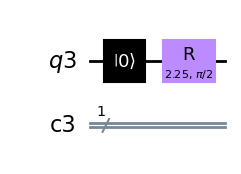

In [76]:
def qc_desired_vector():
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    desired_vector = [
       np.sqrt(normalized_w[0])
       ,np.sqrt(normalized_w[1])]
    qc = QuantumCircuit(qr,cr, name='qc_initialize')
    qc.initialize(desired_vector, [qr[0]])
    return qc



qc_desired_vector=qc_desired_vector()
qc_desired_vector.decompose().decompose().decompose().decompose().decompose().draw('mpl')
#qc.measure(qr[0],cr[0])
#qc.measure(qr,cr)
#qc.measure(qr[0],cr[0])
#qc.measure(qr[1],cr[1]);
#qc.measure([1],[1]);
     #qc.draw(output='mpl')
#type(desired_vector)

In [102]:
(w[0]+w[1]+w[2]+w[3])/trace_rho

(1.2247492122982295+0j)

In [244]:
normalized_w[0]

0j

In [99]:
normalized_w[0] +normalized_w[1]+normalized_w[2]+normalized_w[3]

(1.2247492122982295+0j)

In [103]:
# Initializing a four-qubit quantum state
#def qc_initialize():

desired_vector_ = [
    math.sqrt(normalized_w[0]),
    math.sqrt(normalized_w[1]),
    math.sqrt(normalized_w[2]),
    math.sqrt(normalized_w[3])]

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
#qc = QuantumCircuit(qr)
qc = QuantumCircuit(qr,cr, name='qc_initialize')

qc.initialize(desired_vector_, [qr[0],qr[1]])

#qc.measure(qr[0],cr[0])
#qc.measure(qr,cr)
#qc.measure(qr[1],cr[1]);
#qc.measure([1],[1]);
qc.draw(output='mpl')
#type(desired_vector)
#qc_initialize=qc_initialize()
#qc_initialize.draw('mpl')

C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\896550988.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  math.sqrt(normalized_w[0]),
C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\896550988.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  math.sqrt(normalized_w[1]),
C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\896550988.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  math.sqrt(normalized_w[2]),
C:\Users\dougl\AppData\Local\Temp\ipykernel_7544\896550988.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  math.sqrt(normalized_w[3])]


QiskitError: 'Sum of amplitudes-squared does not equal one.'

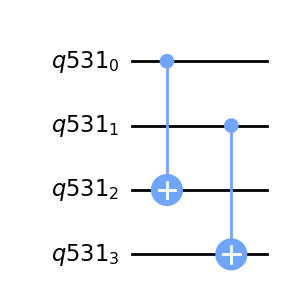

In [151]:
def qc_CNOTS_mistura():
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr, name = 'mistura')
    qc.cx(0,2)
    qc.cx(1,3)
    return qc

qc_CNOTS_mistura=qc_CNOTS_mistura()
qc_CNOTS_mistura.draw('mpl')

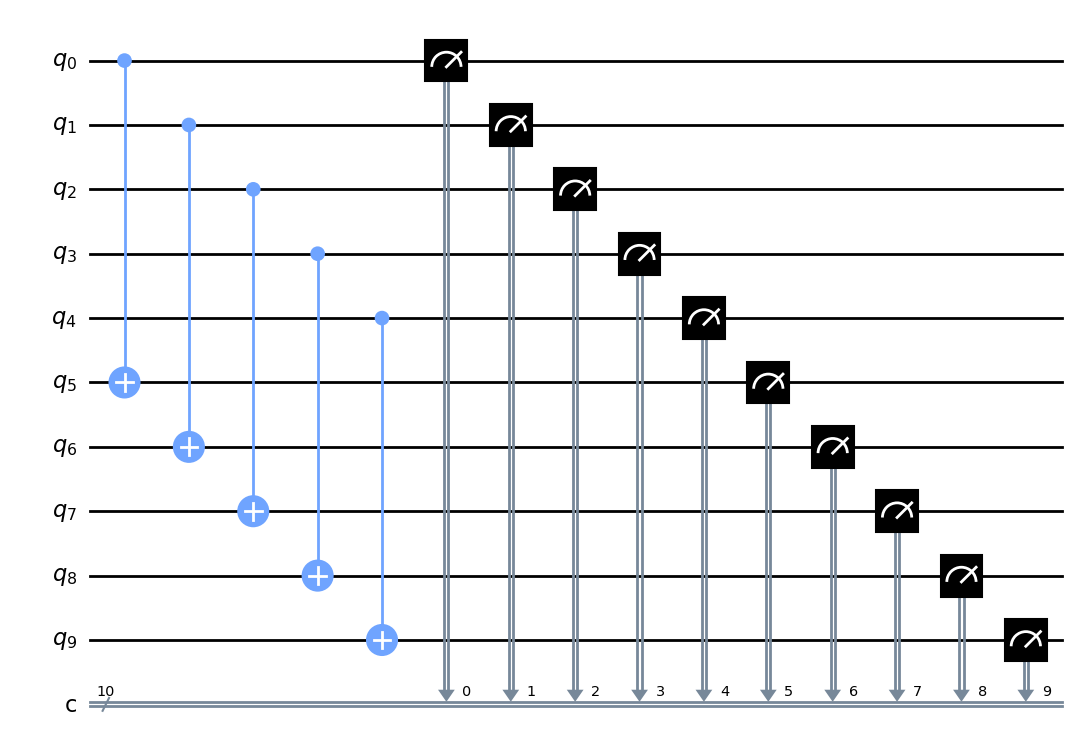

In [157]:
from qiskit import QuantumCircuit, Aer, execute

# Define o número de qubits
n = 5
qubits = 2*n

# Cria um circuito quântico com qubits
circuito = QuantumCircuit(qubits, qubits)

# Aplica portas CNOT para cada par de qubits adjacentes
for i in range(n):
    circuito.cx(i, n+i)
   # circuito.cx(n+i, i)

# Mede todos os qubits
circuito.measure(range(qubits), range(qubits))

circuito.draw('mpl')

# Simula o circuito
#simulador = Aer.get_backend('qasm_simulator')
#resultados = execute(circuito, simulador, shots=nshots).result()

# Imprime os resultados
#print(resultados.get_counts(circuito))



Os operadores unitários podem ser inseridos diretamente em um QuantumCircuit usando o método QuantumCircuit.append. Isso converte o Operator em um objeto UnitaryGate, que é adicionado ao circuito.

Se o operador não for unitário, uma exceção será levantada. Isso pode ser verificado usando a função Operator.is_unitary(), que retornará True se o operador for unitário e False caso contrário.

In [308]:
import numpy as np

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.compiler import transpile
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.quantum_info import process_fidelity

from qiskit.extensions import RXGate, XGate, CXGate

In [309]:
XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
XX

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [310]:
XX.data

array([[0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [40]:
input_dim, output_dim = XX.dim
input_dim, output_dim

In [161]:
# Create an operator from a QuantumCircuit object
circ = QuantumCircuit(10)
circ.h(0)
for j in range(1, 10):
    circ.cx(j-1, j)

# Convert circuit to an operator by implicit unitary simulation
Operator(circ)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))

In [75]:
XXXX = Operator(np.kron(([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]),([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])))

In [313]:
UU_ = Operator(np.kron(U_,U_))

In [314]:
print(UU_)

Operator([[ 0.17980122-0.49230976j,  0.17132852-0.46911083j,
            0.17132852-0.46911083j,  0.16325506-0.44700509j],
          [-0.40925725+0.28622881j,  0.42949624-0.30038368j,
           -0.38997197+0.27274096j,  0.40925725-0.28622881j],
          [-0.40925725+0.28622881j, -0.38997197+0.27274096j,
            0.42949624-0.30038368j,  0.40925725-0.28622881j],
          [ 0.47588419-0.j        , -0.49941809+0.j        ,
           -0.49941809+0.j        ,  0.52411581+0.j        ]],
         input_dims=(2, 2), output_dims=(2, 2))


In [80]:
print(XXXX)

Operator([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
           0.+0.j, 

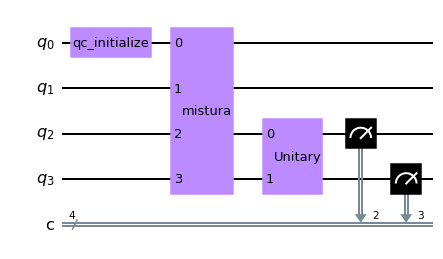

In [315]:
# Create an operator
#XX = Operator(Pauli('XX'))
#CX = Operator(CXGate())
circ = QuantumCircuit(4,4)
#theta = Parameter('θ')
#phi = Parameter('φ')
circ.append(qc_desired_vector, [0])
#U = Operator([[cos(pi/2), 0,-sin(pi/2),0], [0, sin(pi),0,cos(pi)],[0, cos(pi),0,-sin(pi)],[sin(pi/2), 0,cos(pi/2),0]])
#XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
UU_ = Operator(np.kron(U_,U_))
#XXXX = Operator(np.kron(([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]),([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])))
# Add to a circuit
circ.append(qc_CNOTS_mistura, [0,1,2,3])
circ.append(UU_ , [2, 3])
#circ.append(XXXX, [0, 1, 2, 3])
circ.measure([2,3], [2,3])
#circ.decompose().draw('mpl')
#print(circ.decompose())
circ.draw('mpl')

#qstc = state_tomography_circuits(circ, [qr[0], qr[1], qr[2],qr[3]]); # circuito para TEQ
#job_sim = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots = nshots)
#print(job_sim.job_id()); job_monitor(job_sim)
#qstf = StateTomographyFitter(job_sim.result(), qstc) # ajusta os dados
#rhoDC= qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
#print(rhoDC)
#Csim[j] = coh_l1(rhoDC)
#print(Csim[j])